<a href="https://colab.research.google.com/github/emiliamusso/sedronar_dataanalysis/blob/main/Base_de_datos_RECORTE_PARA_ABOGACIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\emimu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

In [ ]:
# URL del archivo CSV
url = "https://infra.datos.gob.ar/catalog/sedronar/dataset/5/distribution/5.1/download/base_usuario_encoprac2022.txt"

In [ ]:
# Cargar los datos desde la URL en un DataFrame de pandas
df = pd.read_csv(url, sep='|')  # El parámetro sep='|' se utiliza para especificar que el archivo está separado por tabulaciones

# Mostrar las primeras filas del DataFrame
df.head()

C:\Users\emimu\AppData\Local\Temp\ipykernel_3488\3760622840.py:2: DtypeWarning: Columns (175,176,206,207,276,381,382,383,396,397,424) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep='|')  # El parámetro sep='|' se utiliza para especificar que el archivo está separado por tabulaciones


,ID_PER,WPER,CANT_MIEMBROS_HOGAR,CANT_PERSONAS0A17,CLIMA_EDUCATIVO,J_SEXO,J_EDAD,J_NIVEL_EDUCATIVO,SEXO_SEL,EDAD_SEL,...,ID_06B,ID_06C,ID_06D,ID_06E,ID_06F,ID_06G,ID_06H,ID_06I,ID_07,ID_08
0,336578,124,1,0,2,1,27,4,1,27,...,4,2,2,1,1,99,2,3,1,98.0
1,305909,781,1,0,3,1,33,6,1,33,...,2,2,1,3,2,3,2,4,2,NaN
2,358892,34193,4,1,2,1,43,4,2,19,...,1,2,2,4,2,4,2,2,2,NaN
3,342664,968,1,0,3,2,51,6,2,51,...,1,4,4,1,1,1,1,1,2,NaN
4,394688,11509,2,0,3,2,59,5,1,31,...,2,1,1,2,2,4,2,2,2,NaN


In [ ]:
df.shape

(12062, 562)

In [ ]:
df.columns

Index(['ID_PER', 'WPER', 'CANT_MIEMBROS_HOGAR', 'CANT_PERSONAS0A17',
       'CLIMA_EDUCATIVO', 'J_SEXO', 'J_EDAD', 'J_NIVEL_EDUCATIVO', 'SEXO_SEL',
       'EDAD_SEL',
       ...
       'ID_06B', 'ID_06C', 'ID_06D', 'ID_06E', 'ID_06F', 'ID_06G', 'ID_06H',
       'ID_06I', 'ID_07', 'ID_08'],
      dtype='object', length=562)

In [ ]:
df['CO_04'].describe()

count    421.000000
mean       1.793349
std        0.405385
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: CO_04, dtype: float64

In [ ]:
columna_interes = 'PV_CO_16A49'

# Calcula el conteo de valores únicos en la columna
conteo_valores = df_no_nulos[columna_interes].value_counts()
casos_no_nulos = df[columna_interes].notna()

df_no_nulos = df[casos_no_nulos]

# Calcula el porcentaje de personas que respondieron con 1 y 0
porcentaje_1 = ((conteo_valores[1] * 100) / len(df_no_nulos['PV_CO_16A49']))
porcentaje_0 = ((conteo_valores[0] * 100) / len(df_no_nulos['PV_CO_16A49']))

# Imprime los resultados
print(f'Porcentaje de personas que respondieron con 1: {porcentaje_1}%')
print(f'Porcentaje de personas que respondieron con 0: {porcentaje_0}%')


NameError: name 'df_no_nulos' is not defined

In [ ]:
filtrados = df_no_nulos[(df_no_nulos['EDAD_SEL'] >= 16) & (df_no_nulos['EDAD_SEL'] <= 49) & (df_no_nulos['GRUPO_EDAD_SEL'].isin([1, 2, 3]))]

In [ ]:
filtrados['PV_CO_16A49'].value_counts()

PV_CO_16A49
0.0    7246
1.0     372
Name: count, dtype: int64

In [ ]:
filtrados.shape

(7618, 562)

In [ ]:
df.shape

(12062, 562)

In [ ]:
columna_interes = 'PV_CO_16A49'

# Calcula el conteo de valores únicos en la columna
conteo_valores = filtrados[columna_interes].value_counts()
casos_no_nulos = filtrados[columna_interes].notna()
df_no_nulos = filtrados[casos_no_nulos]


# Calcula el porcentaje de personas que respondieron con 1 y 0
porcentaje_1 = ((conteo_valores[1] * 100) / len(filtrados['PV_CO_16A49']))
porcentaje_0 = ((conteo_valores[0] * 100) / len(filtrados['PV_CO_16A49']))

# Imprime los resultados
print(f'Porcentaje de personas que respondieron con 1: {porcentaje_1}%')
print(f'Porcentaje de personas que respondieron con 0: {porcentaje_0}%')

Porcentaje de personas que respondieron con 1: 4.88317143607246%
Porcentaje de personas que respondieron con 0: 95.11682856392754%


In [ ]:
len(df['PV_CO_16A49'].notna())

12062

In [ ]:
filtrados['PV_CO_16A49'].isna().value_counts()

PV_CO_16A49
False    7618
Name: count, dtype: int64

In [ ]:
df['PV_CO_16A49'].value_counts()

PV_CO_16A49
0.0    7246
1.0     372
Name: count, dtype: int64

In [ ]:
df['PV_CO_16A49'].isna().value_counts()

PV_CO_16A49
False    7618
True     4444
Name: count, dtype: int64

In [ ]:

columna_interes = 'AL_01'

# Calcula el conteo de valores únicos en la columna
conteo_valores = df[columna_interes].value_counts()

# Calcula el porcentaje de personas que respondieron con 1 y 0
porcentaje_1 = (conteo_valores[1] / len(df)) * 100
porcentaje_0 = (conteo_valores[2] / len(df)) * 100

# Imprime los resultados
print(f'Porcentaje de personas que respondieron con 1: {porcentaje_1:.2f}%')
print(f'Porcentaje de personas que respondieron con 0: {porcentaje_0:.2f}%')

Porcentaje de personas que respondieron con 1: 82.81%
Porcentaje de personas que respondieron con 0: 17.15%


In [ ]:
columna_interes = 'EX_04'

# Calcula el conteo de valores únicos en la columna
conteo_valores = df[columna_interes].value_counts()

# Calcula el porcentaje de personas que respondieron con 1 y 0
porcentaje_1 = (conteo_valores[1] / len(df)) * 100
porcentaje_0 = (conteo_valores[2] / len(df)) * 100

# Imprime los resultados
print(f'Porcentaje de personas que respondieron con 1: {porcentaje_1:.2f}%')
print(f'Porcentaje de personas que respondieron con 0: {porcentaje_0:.2f}%')

Porcentaje de personas que respondieron con 1: 0.30%
Porcentaje de personas que respondieron con 0: 0.87%



## Códigos de no respuesta <br>
Para las variables categóricas se incluyen los códigos: <br>
- 98: No recuerda <br>
- 99: No sabe/no contesta - <br>

Para las variables numéricas se incluyen los códigos: <br>
- 777: No consume de forma excesiva (AL_19) <br>
- 888: No se pueden calcular los tragos consumidos (AL_06 y AL_19) <br>
- 998: No recuerda 999: No sabe/no contesta

In [ ]:
#'PV_CO_16A49' cocaína prevalencia de vida, 'ALU_01' alucinogenos prevalencia de vida,
#'EX_01' extasis prevalencia de vida, 'PB_01' pasta base prev de vida,
#'IN_01' inyectables y/o solventes prev de vida, 'OD_01A' metanfetamina alguna vez en la vida
# OD_02A anfetaminas alguna vez en la vida
# OD_03A ketamina alguna vez en la vida
#OD_04A GHB alguna vez en la vida
columnas = ['ALU_01', 'EX_01', 'PB_01', 'IN_01', 'OD_01A', 'OD_02A', 'OD_03A', 'OD_04A']
df_fil_eda = df[columnas]

In [ ]:
df_fil_eda.head()

,ALU_01,EX_01,PB_01,IN_01,OD_01A,OD_02A,OD_03A,OD_04A
0,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2


In [ ]:
df_fil_eda.replace(99, pd.NA, inplace=True)
nulos_por_columna = df_fil_eda.isnull().sum()
print(nulos_por_columna)

ALU_01    5
EX_01     7
PB_01     7
IN_01     5
OD_01A    0
OD_02A    1
OD_03A    0
OD_04A    0
dtype: int64


C:\Users\emimu\AppData\Local\Temp\ipykernel_1312\3423826009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil_eda.replace(99, pd.NA, inplace=True)


In [ ]:
nulos_por_columna = df_fil_eda.isnull().sum()
print(nulos_por_columna)

ALU_01    5
EX_01     7
PB_01     7
IN_01     5
OD_01A    0
OD_02A    1
OD_03A    0
OD_04A    0
dtype: int64


In [ ]:
df_fil_eda['ALU_01'].value_counts()

ALU_01
2    11782
1      275
Name: count, dtype: int64

In [ ]:
valores = {columna: df_fil_eda[columna].value_counts() for columna in df_fil_eda.columns}
print(valores)

{'ALU_01': ALU_01
2    11782
1      275
Name: count, dtype: int64, 'EX_01': EX_01
2    11914
1      141
Name: count, dtype: int64, 'PB_01': PB_01
2    12028
1       27
Name: count, dtype: int64, 'IN_01': IN_01
2    12004
1       53
Name: count, dtype: int64, 'OD_01A': OD_01A
2    12041
1       21
Name: count, dtype: int64, 'OD_02A': OD_02A
2    12034
1       27
Name: count, dtype: int64, 'OD_03A': OD_03A
2    12042
1       20
Name: count, dtype: int64, 'OD_04A': OD_04A
2    12057
1        5
Name: count, dtype: int64}


In [ ]:
for columna_interes in df_fil_eda.columns:
    # Calcula el conteo de valores únicos en la columna
    conteo_valores = df_fil_eda[columna_interes].value_counts()
    casos_no_nulos = df_fil_eda[columna_interes].notna()
    df_no_nulos = df_fil_eda[casos_no_nulos]
    # Calcula el porcentaje de personas que respondieron con 1 y 0
    porcentaje_1 = ((conteo_valores[1] * 100) / len(df_no_nulos[columna_interes]))
    porcentaje_2 = ((conteo_valores[2] * 100) / len(df_no_nulos[columna_interes]))

    # Imprime los resultados
    print(f'{columna_interes} Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): {porcentaje_1}%')
    print(f'{columna_interes} Porcentaje de personas que respondieron con 2 (NO CONSUMIO -PV-): {porcentaje_2}%')
    print('-')

ALU_01 Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): 2.2808327112880487%
ALU_01 Porcentaje de personas que respondieron con 2 (NO CONSUMIO -PV-): 97.71916728871196%
-
EX_01 Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): 1.1696391538780588%
EX_01 Porcentaje de personas que respondieron con 2 (NO CONSUMIO -PV-): 98.83036084612193%
-
PB_01 Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): 0.22397345499792617%
PB_01 Porcentaje de personas que respondieron con 2 (NO CONSUMIO -PV-): 99.77602654500207%
-
IN_01 Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): 0.4395786679936966%
IN_01 Porcentaje de personas que respondieron con 2 (NO CONSUMIO -PV-): 99.5604213320063%
-
OD_01A Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): 0.1741004808489471%
OD_01A Porcentaje de personas que respondieron con 2 (NO CONSUMIO -PV-): 99.82589951915105%
-
OD_02A Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-)

In [ ]:
#'PV_CO_16A49' cocaína prevalencia de vida, 'ALU_01' alucinogenos prevalencia de vida,
#'EX_01' extasis prevalencia de vida, 'PB_01' pasta base prev de vida,
#'IN_01' inhalables y/o solventes prev de vida, 'OD_01A' metanfetamina alguna vez en la vida
# OD_02A anfetaminas alguna vez en la vida
# OD_03A ketamina alguna vez en la vida
#OD_04A GHB alguna vez en la vida

In [ ]:
# Supongamos que tienes un DataFrame llamado df_fil_eda con las columnas 'ALU_01', 'EX_01', 'PB_01', 'IN_01', 'OD_01A', 'OD_02A', 'OD_03A', 'OD_04A'.
columnas = ['MA_01', 'CO_01', 'ALU_01', 'EX_01', 'PB_01', 'IN_01', 'OD_01A', 'OD_02A', 'OD_03A', 'OD_04A', 'OD_05A', 'OD_06A']
df_fil_eda = df[columnas]

# Crear una nueva variable llamada 'NUEVA_VARIABLE' basada en la condición que mencionaste.
df_fil_eda['CONSUMO_SPASILEGALES_PV'] = (df_fil_eda == 1).all(axis=1).astype(int)

# La nueva variable 'NUEVA_VARIABLE' contendrá 1 para las filas que cumplan con la condición y 0 para las que no cumplan.

# Si deseas imprimir el DataFrame resultante, puedes hacerlo de la siguiente manera:
print(df_fil_eda)

In [ ]:
columnas = ['MA_01', 'CO_01', 'ALU_01', 'EX_01', 'PB_01', 'IN_01', 'OD_01A', 'OD_02A', 'OD_03A', 'OD_04A', 'OD_05A', 'OD_06A']
df_fil_eda1 = df[columnas]


valores = {columna: df_fil_eda1[columna].value_counts() for columna in df_fil_eda1.columns}
print(valores)

{'MA_01': MA_01
2     10018
1      2033
99       11
Name: count, dtype: int64, 'CO_01': CO_01
2     11632
1       421
99        9
Name: count, dtype: int64, 'ALU_01': ALU_01
2     11782
1       275
99        5
Name: count, dtype: int64, 'EX_01': EX_01
2     11914
1       141
99        7
Name: count, dtype: int64, 'PB_01': PB_01
2     12028
1        27
99        7
Name: count, dtype: int64, 'IN_01': IN_01
2     12004
1        53
99        5
Name: count, dtype: int64, 'OD_01A': OD_01A
2    12041
1       21
Name: count, dtype: int64, 'OD_02A': OD_02A
2     12034
1        27
99        1
Name: count, dtype: int64, 'OD_03A': OD_03A
2    12042
1       20
Name: count, dtype: int64, 'OD_04A': OD_04A
2    12057
1        5
Name: count, dtype: int64, 'OD_05A': OD_05A
2    12056
1        6
Name: count, dtype: int64, 'OD_06A': OD_06A
2    12060
1        2
Name: count, dtype: int64}


In [ ]:
columnas = ['MA_01', 'CO_01', 'ALU_01', 'EX_01', 'PB_01', 'IN_01', 'OD_01A', 'OD_02A', 'OD_03A', 'OD_04A', 'OD_05A', 'OD_06A']
df_fil_eda1 = df[columnas]

# Crear una nueva variable llamada 'CONSUMO_SPASILEGALES_PV' con las condiciones especificadas.
df_fil_eda1['CONSUMO_SPASILEGALES_PV'] = (df_fil_eda1 == 1).any(axis=1).astype(int) & ~((df_fil_eda1 == 2) | (df_fil_eda1 == 99)).all(axis=1).astype(int)

# La nueva variable 'CONSUMO_SPASILEGALES_PV' contendrá 1 si el caso tiene al menos un 1 en alguna de las columnas,
# y 0 si el caso tiene 2 en TODAS las columnas.

# Si deseas imprimir el DataFrame resultante, puedes hacerlo de la siguiente manera:
print(df_fil_eda1)


       MA_01  CO_01  ALU_01  EX_01  PB_01  IN_01  OD_01A  OD_02A  OD_03A  \
0          1      2       2      2      2      2       2       2       2   
1          1      2       2      2      2      2       2       2       2   
2          2      2       2      2      2      2       2       2       2   
3          2      2       2      2      2      2       2       2       2   
4          1      2       2      2      2      2       2       2       2   
...      ...    ...     ...    ...    ...    ...     ...     ...     ...   
12057      2      2       2      2      2      2       2       2       2   
12058      2      2       2      2      2      2       2       2       2   
12059      2      2       2      2      2      2       2       2       2   
12060      2      2       2      2      2      2       2       2       2   
12061      2      2       2      2      2      2       2       2       2   

       OD_04A  OD_05A  OD_06A  CONSUMO_SPASILEGALES_PV  
0           2       2       2 

C:\Users\emimu\AppData\Local\Temp\ipykernel_1312\461739040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil_eda1['CONSUMO_SPASILEGALES_PV'] = (df_fil_eda1 == 1).any(axis=1).astype(int) & ~((df_fil_eda1 == 2) | (df_fil_eda1 == 99)).all(axis=1).astype(int)


In [ ]:
df_fil_eda1['CONSUMO_SPASILEGALES_PV'].value_counts()

CONSUMO_SPASILEGALES_PV
0    9958
1    2104
Name: count, dtype: int64

In [ ]:
df_fil_eda1['CONSUMO_SPASILEGALES_PV'].isna().value_counts()

CONSUMO_SPASILEGALES_PV
False    12062
Name: count, dtype: int64

In [ ]:
# Calcula el conteo de valores únicos en la columna
conteo_valores = df_fil_eda1['CONSUMO_SPASILEGALES_PV'].value_counts()

porcentaje_1 = ((conteo_valores[1] * 100) / len(df_fil_eda1['CONSUMO_SPASILEGALES_PV']))
porcentaje_0 = ((conteo_valores[0] * 100) / len(df_fil_eda1['CONSUMO_SPASILEGALES_PV']))

print(f'Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): {porcentaje_1}%')
print(f'Porcentaje de personas que respondieron con 0 (NO CONSUMIO -PV-): {porcentaje_0}%')
print('-')

Porcentaje de personas que respondieron con 1 (SI CONSUMIO -PV-): 17.443210081246892%
Porcentaje de personas que respondieron con 0 (NO CONSUMIO -PV-): 82.55678991875311%
-


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\emimu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


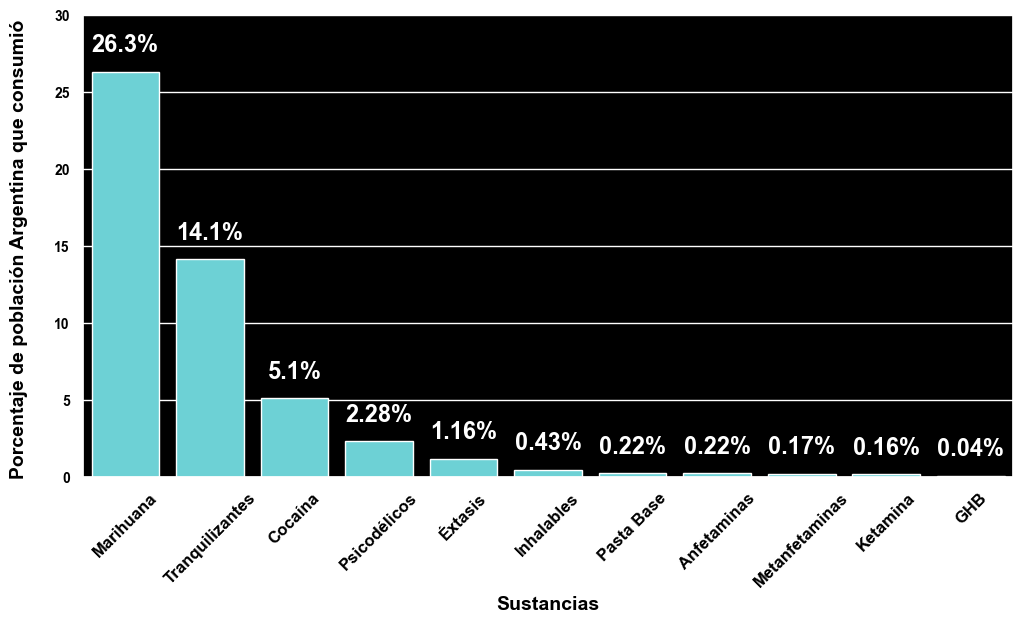

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos
data = {
    'Sustancia': ['Marihuana', 'Tranquilizantes', 'Cocaína', 'Éxtasis', 'Psicodélicos', 'Pasta Base', 'Inhalables', 'Metanfetaminas', 'Anfetaminas', 'Ketamina', 'GHB'],
    'Porcentaje': [26.3, 14.1, 5.1, 1.16, 2.28, 0.22, 0.43, 0.17, 0.22, 0.16, 0.04]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Ordenar el DataFrame por porcentaje en orden descendente
df = df.sort_values(by='Porcentaje', ascending=False)

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")
sns.set_palette("viridis")

# Crear el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Sustancia", y="Porcentaje", data=df, color='#5ce1e6')

# Ajustar el rango del eje y manualmente para dar espacio al porcentaje más alto
ax.set_ylim(0, 30)  # Ajusta el rango de 0 a 30 (puedes cambiar el valor según sea necesario)

# Configurar el estilo del gráfico
#plt.title("Prevalencia de Consumo alguna vez en la vida, para SPAs ilegales \n", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Sustancias", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Porcentaje de población Argentina que consumió \n", fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# Configurar el color de fondo
plt.gca().set_facecolor('black')
ax.set_facecolor('black')

# Agregar el porcentaje en las barras (un poco más arriba)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height() + 1), ha='center', va='bottom', fontsize=17, color='white', fontweight='bold')

# Mostrar el gráfico
plt.show()


In [ ]:
columnas = ['GRUPO_EDAD_SEL', 'P1M_AL', 'P1M_MA', 'ALU_07', 'EX_06']
df1 = df[columnas]


valores = {columna: df1[columna].value_counts() for columna in df1.columns}
print(valores)

{'GRUPO_EDAD_SEL': GRUPO_EDAD_SEL
3    3373
4    2929
2    2447
1    1798
5    1515
Name: count, dtype: int64, 'P1M_AL': P1M_AL
0    6166
1    5896
Name: count, dtype: int64, 'P1M_MA': P1M_MA
0    11315
1      747
Name: count, dtype: int64, 'ALU_07': ALU_07
2.0    47
1.0    12
Name: count, dtype: int64, 'EX_06': EX_06
2.0    32
1.0     4
Name: count, dtype: int64}


In [ ]:
df_prev.shape

(12062, 5)

In [ ]:
df1['ALU_07'].value_counts()

ALU_07
2.0    47
1.0    12
Name: count, dtype: int64

In [ ]:
df_prev1 = df_prev[(df_prev['GRUPO_EDAD_SEL'] == 1) | (df_prev['GRUPO_EDAD_SEL'] == 2)]


In [ ]:
df_prev1.shape

(4245, 5)

In [ ]:
columna_interes = 'EX_06'

# Calcula el conteo de valores únicos en la columna
conteo_valores = df_prev[columna_interes].value_counts()
casos_no_nulos = df_prev[columna_interes].notna()

df_no_nulos = df_prev[casos_no_nulos]

# Calcula el porcentaje de personas que respondieron con 1 y 0
porcentaje_1 = ((conteo_valores[1] * 100) / len(df_no_nulos['EX_06']))
porcentaje_2 = ((conteo_valores[2] * 100) / len(df_no_nulos['EX_06']))

# Imprime los resultados
print(f'Porcentaje de personas que respondieron con 1: {porcentaje_1}%')
print(f'Porcentaje de personas que respondieron con 2: {porcentaje_2}%')

Porcentaje de personas que respondieron con 1: 11.11111111111111%
Porcentaje de personas que respondieron con 2: 88.88888888888889%


In [ ]:
columnas = ['GRUPO_EDAD_SEL', 'P1A_MA', 'CO_04', 'ALU_05', 'EX_04']
df_PA = df[columnas]
df_PA = df_PA[(df_PA['GRUPO_EDAD_SEL'] == 1)]

valores = {columna: df_PA[columna].value_counts() for columna in df_PA.columns}
print(valores)

{'GRUPO_EDAD_SEL': GRUPO_EDAD_SEL
1    1798
Name: count, dtype: int64, 'P1A_MA': P1A_MA
0    1486
1     312
Name: count, dtype: int64, 'CO_04': CO_04
2.0    28
1.0    19
Name: count, dtype: int64, 'ALU_05': ALU_05
2.0    44
1.0    24
Name: count, dtype: int64, 'EX_04': EX_04
1.0    16
2.0    15
Name: count, dtype: int64}


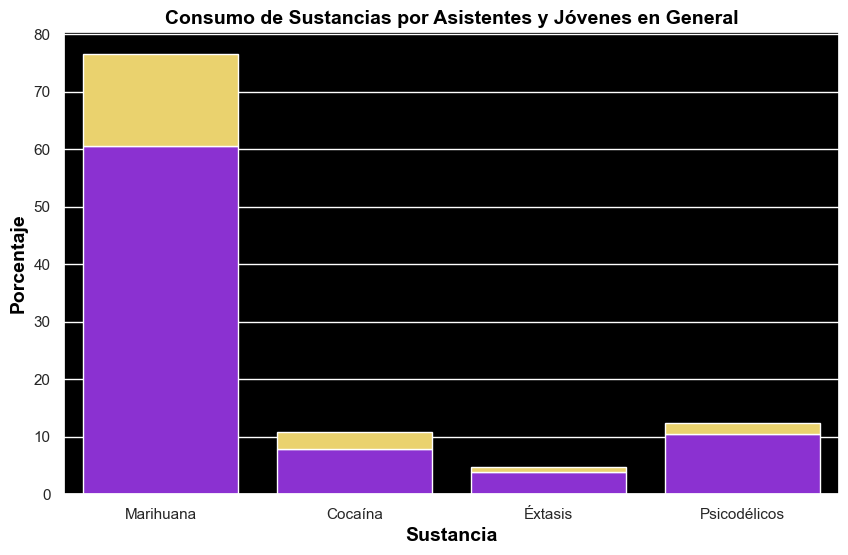

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario con los datos
data = {
    'Sustancia': ['Marihuana', 'Cocaína', 'Éxtasis', 'Psicodélicos'],
    'Asistentes': [60.6, 7.8, 3.8, 10.5],
    'Jovenes en general': [15.9, 3, 0.9, 1.9]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Establecer el estilo de Seaborn


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para Asistentes
sns.barplot(x='Sustancia', y='Asistentes', data=df, color="#8e17eb")

# Barras para Jóvenes en general
sns.barplot(x='Sustancia', y='Jovenes en general', data=df, color="#ffde59", bottom=df['Asistentes'])

# Personalización del gráfico
plt.xlabel('Sustancia', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold', color='black')
plt.title('Consumo de Sustancias por Asistentes y Jóvenes en General', fontsize=14, fontweight='bold', color='black')
plt.gca().set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')

# Mostrar el gráfico
plt.show()


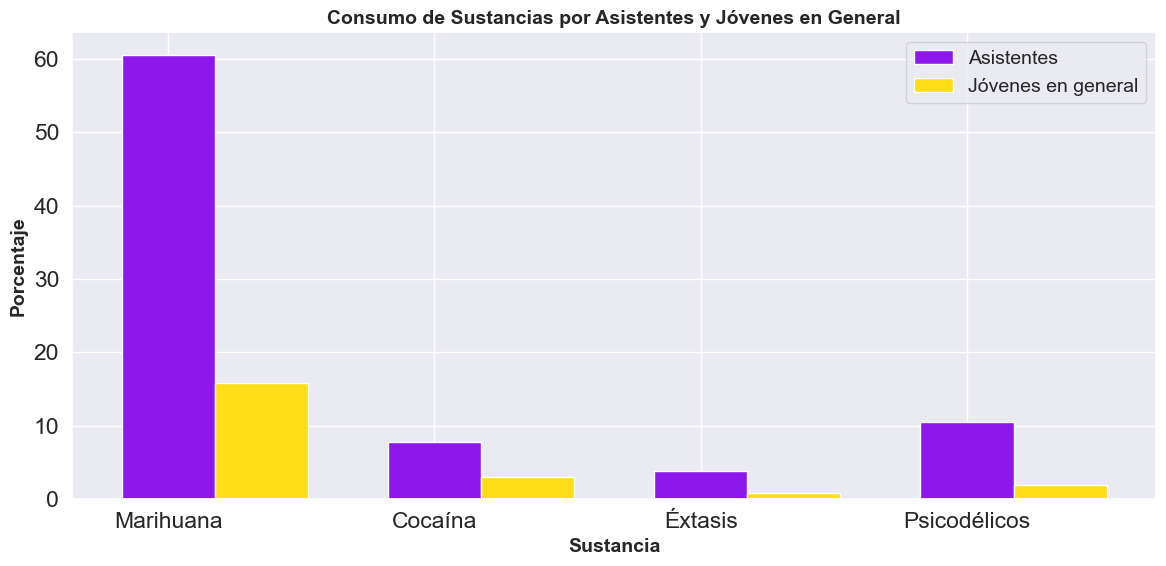

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de entrada
data = {
    'Sustancia': ['Marihuana', 'Cocaína', 'Éxtasis', 'Psicodélicos'],
    'Asistentes': [60.6, 7.8, 3.8, 10.5],
    'Jovenes en general': [15.9, 3, 0.9, 1.9]
}

# Crear un DataFrame con los datos
plot_data = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")
sns.set_palette("viridis")

# Configurar la tipografía y tamaño de fuente
sns.set(font_scale=1.5)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Calcular las posiciones para las barras
bar_width = 0.35
positions_asistentes = range(len(plot_data))
positions_jovenes = [p + bar_width for p in positions_asistentes]

# Crear las barras
plt.bar(positions_asistentes, plot_data['Asistentes'], width=bar_width, color='#8e17eb', label='Asistentes')
plt.bar(positions_jovenes, plot_data['Jovenes en general'], width=bar_width, color='#ffde19', label='Jóvenes en general')

# Configurar ejes y etiquetas
plt.xlabel('Sustancia', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
plt.title('Consumo de Sustancias por Asistentes y Jóvenes en General', fontsize=14, fontweight='bold')
plt.xticks(positions_asistentes, plot_data['Sustancia'])

# Agregar leyenda
plt.legend(fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


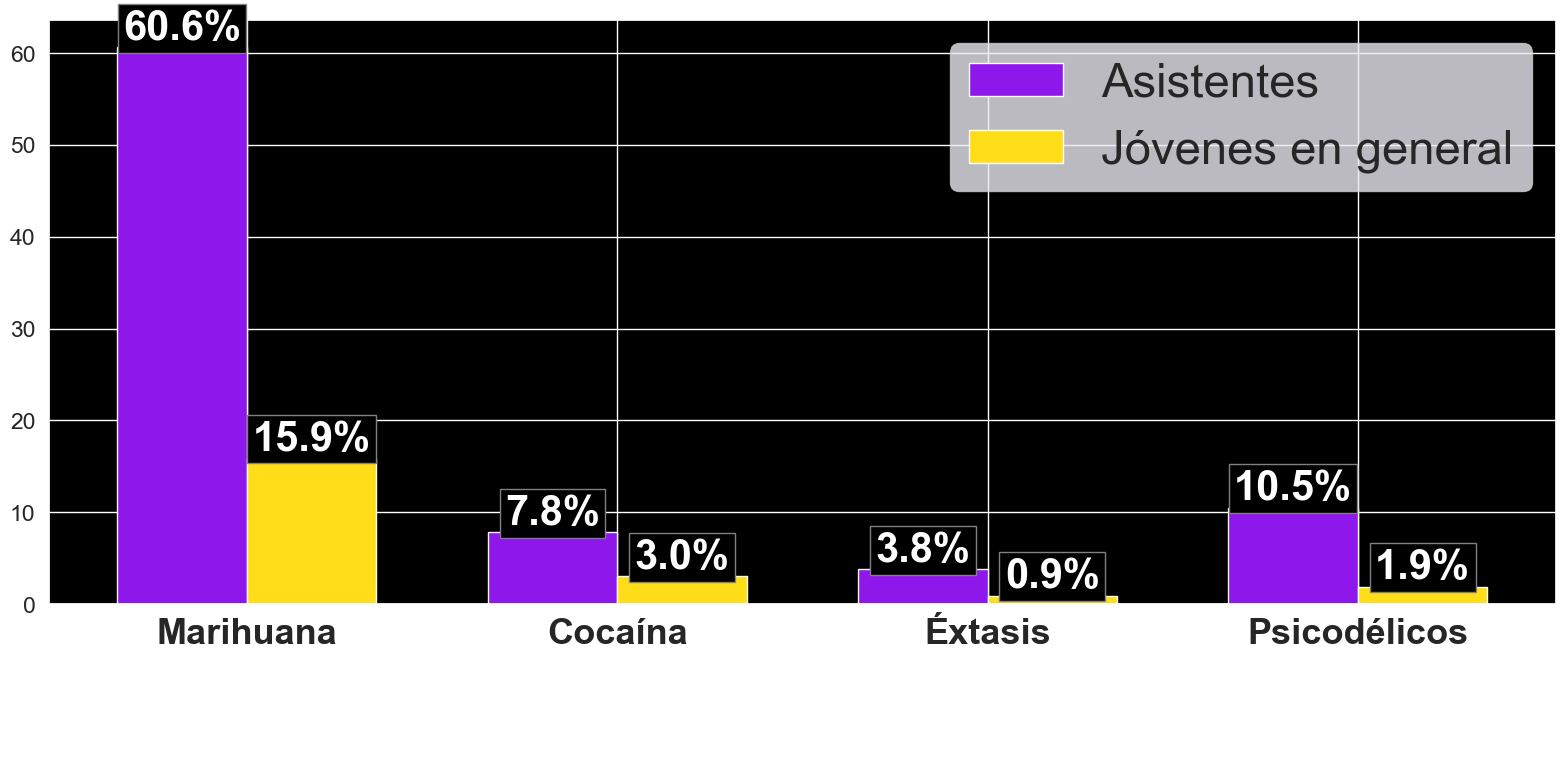

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de entrada
data = {
    'Sustancia': ['Marihuana', 'Cocaína', 'Éxtasis', 'Psicodélicos'],
    'Asistentes': [60.6, 7.8, 3.8, 10.5],
    'Jovenes en general': [15.9, 3, 0.9, 1.9]
}

# Crear un DataFrame con los datos
plot_data = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")
sns.set_palette("viridis")

# Configurar la tipografía y tamaño de fuente
sns.set(font_scale=1.5)

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))

# Calcular las posiciones para las barras
bar_width = 0.35
positions_asistentes = range(len(plot_data))
positions_jovenes = [p + bar_width for p in positions_asistentes]

# Crear las barras
bar1 = plt.bar(positions_asistentes, plot_data['Asistentes'], width=bar_width, color='#8e17eb', label='Asistentes')
bar2 = plt.bar(positions_jovenes, plot_data['Jovenes en general'], width=bar_width, color='#ffde19', label='Jóvenes en general')

# Agregar etiquetas de porcentaje
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=30,
        fontweight='bold',
        color='white',
        bbox={'facecolor': 'black', 'edgecolor': 'grey'}
    )

# Configurar ejes y etiquetas
plt.xlabel('-\n-\n-\n-\n', fontsize=14, fontweight='bold',  color='white')
#plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
#plt.title('Consumo de Sustancias por Asistentes y Jóvenes en General', fontsize=14, fontweight='bold')
plt.xticks([p + bar_width / 2 for p in positions_asistentes], plot_data['Sustancia'], fontsize=26, fontweight='bold')

# Agregar leyenda
plt.legend(fontsize=34)

# Establecer el fondo negro
plt.gca().set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


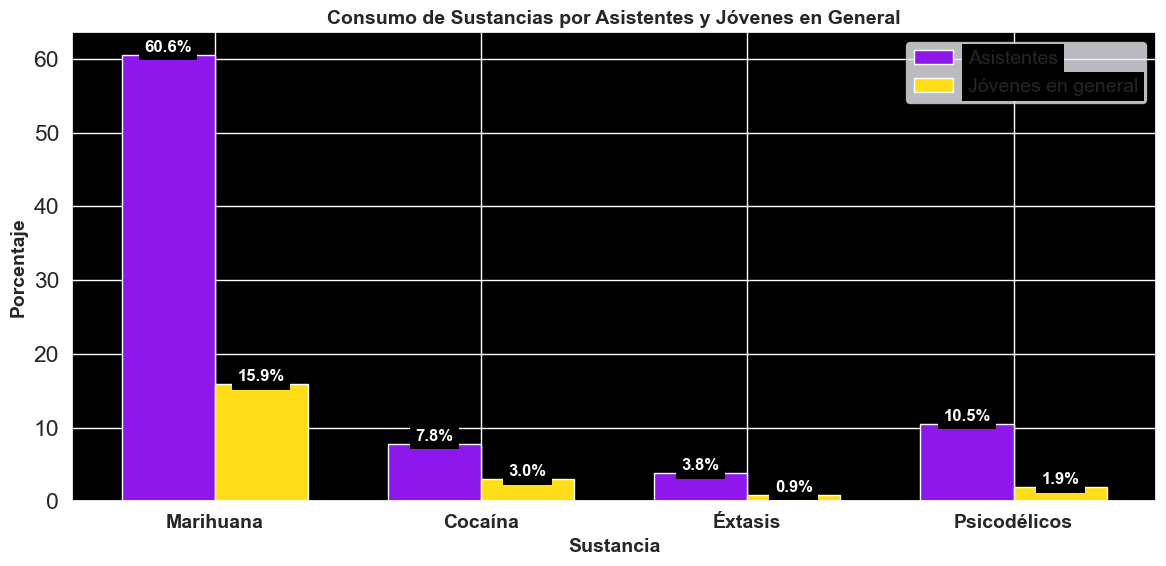

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de entrada
data = {
    'Sustancia': ['Marihuana', 'Cocaína', 'Éxtasis', 'Psicodélicos'],
    'Asistentes': [60.6, 7.8, 3.8, 10.5],
    'Jovenes en general': [15.9, 3, 0.9, 1.9]
}

# Crear un DataFrame con los datos
plot_data = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")
sns.set_palette("viridis")

# Configurar el tamaño de fuente
sns.set(font_scale=1.5)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Calcular las posiciones para las barras
bar_width = 0.35
positions_asistentes = [i for i in range(len(plot_data))]
positions_jovenes = [p + bar_width for p in positions_asistentes]

# Crear las barras
bar1 = plt.bar(positions_asistentes, plot_data['Asistentes'], width=bar_width, color='#8e17eb', label='Asistentes')
bar2 = plt.bar(positions_jovenes, plot_data['Jovenes en general'], width=bar_width, color='#ffde19', label='Jóvenes en general')

# Agregar etiquetas de porcentaje con fondo negro en la leyenda
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='white',
        bbox={'facecolor': 'black', 'edgecolor': 'none'}
    )

# Configurar ejes y etiquetas
plt.xlabel('Sustancia', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
plt.title('Consumo de Sustancias por Asistentes y Jóvenes en General', fontsize=14, fontweight='bold')
plt.xticks([p + bar_width / 2 for p in positions_asistentes], plot_data['Sustancia'], fontsize=14, fontweight='bold')

# Agregar leyenda
legend = plt.legend(fontsize=14)
for label in legend.get_texts():
    label.set_bbox({'facecolor': 'black', 'edgecolor': 'none'})

# Establecer el fondo negro
plt.gca().set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


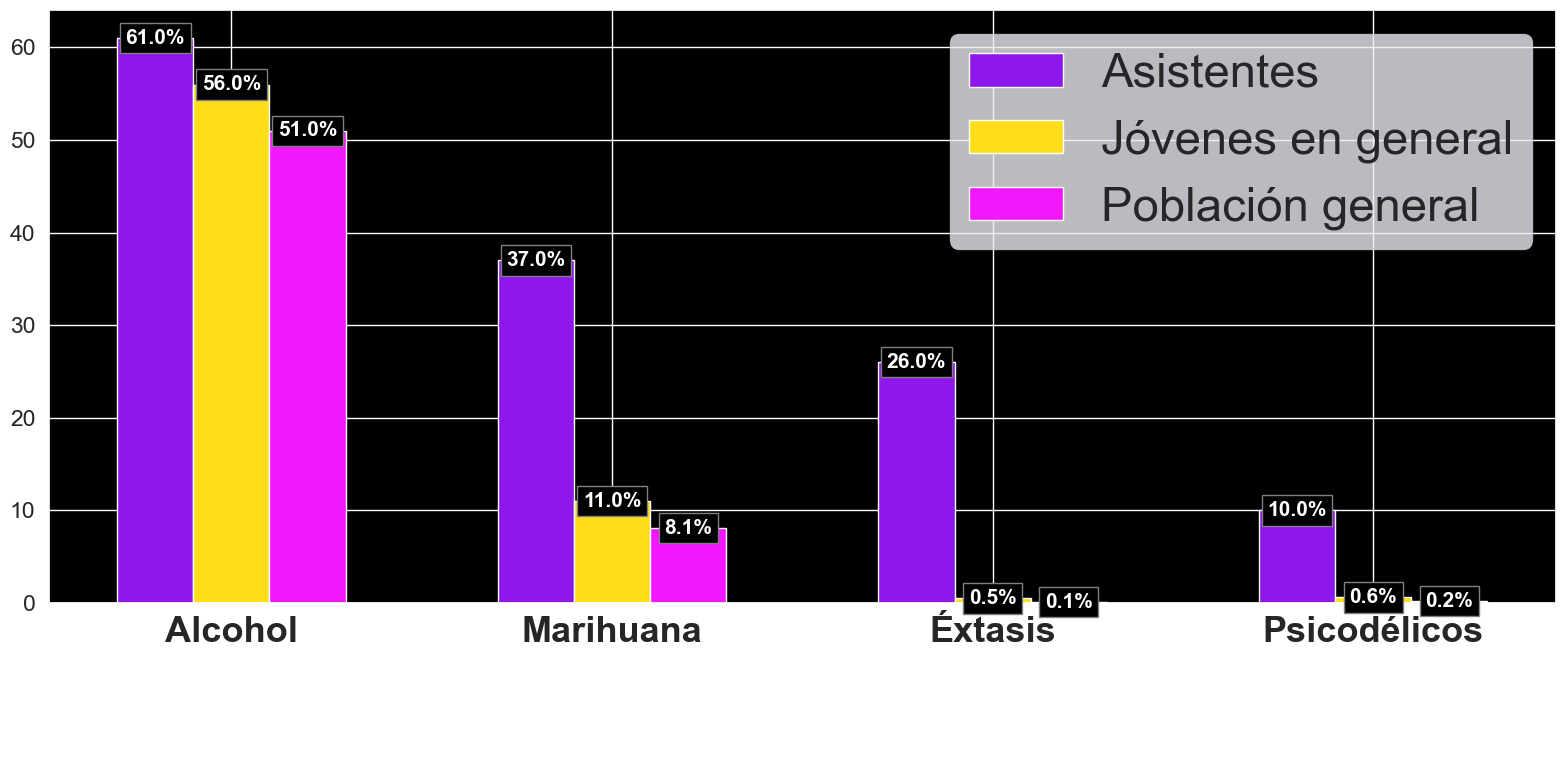

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de entrada
data = {
    'Sustancia': ['Alcohol', 'Marihuana', 'Éxtasis', 'Psicodélicos'],
    'Asistentes': [61, 37, 26, 10],
    'Jovenes en general': [56, 11, 0.5, 0.6],
    'Población general': [51, 8.1, 0.1, 0.2]
}

# Crear un DataFrame con los datos
plot_data = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")
sns.set_palette("viridis")

# Configurar la tipografía y tamaño de fuente
sns.set(font_scale=1.5)

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))

# Calcular las posiciones para las barras
bar_width = 0.20
positions_asistentes = range(len(plot_data))
positions_jovenes = [p + bar_width for p in positions_asistentes]
positions_poblacion = [p + bar_width for p in positions_jovenes]

# Crear las barras
bar1 = plt.bar(positions_asistentes, plot_data['Asistentes'], width=bar_width, color='#8e17eb', label='Asistentes')
bar2 = plt.bar(positions_jovenes, plot_data['Jovenes en general'], width=bar_width, color='#ffde19', label='Jóvenes en general')
bar3 = plt.bar(positions_poblacion, plot_data['Población general'], width=bar_width, color='#f317ff', label='Población general')

# Agregar etiquetas de porcentaje
for bar in bar1 + bar2 + bar3:
    height = bar.get_height()
    plt.text(
       bar.get_x() + bar.get_width() / 2, height,
        f'{height:.1f}%',  # Restar 1 para que el valor sea correcto
        ha='center',
        va='center',  # Cambiar a 'center'
        fontsize=15,
        fontweight='bold',
        color='white',
        bbox={'facecolor': 'black', 'edgecolor': 'grey'}
    )

# Configurar ejes y etiquetas
plt.xlabel('-\n-\n-\n-\n', fontsize=14, fontweight='bold',  color='white')
#plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
#plt.title('Consumo de Sustancias por Asistentes y Jóvenes en General', fontsize=14, fontweight='bold')
plt.xticks([p + bar_width for p in positions_asistentes], plot_data['Sustancia'], fontsize=26, fontweight='bold')

# Agregar leyenda
plt.legend(fontsize=34)

# Establecer el fondo negro
plt.gca().set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
rango = range(1, 349)

lista = [i for i in rango]
